Importing necessary libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the text

In [ ]:
documents = ["kaziranga national park", "kanha tiger reserve", "bandipur national park", "keoladeo national park",
             "periyar national park", "jim corbett national park", "gir national park", "ranthambore tiger reserve",
             "ranganathittu bird park", "ghatprabha bird sanctuary", "manas national park", "vedanthangal bird sanctuary"]
documents

['kaziranga national park',
 'kanha tiger reserve',
 'bandipur national park',
 'keoladeo national park',
 'periyar national park',
 'jim corbett national park',
 'gir national park',
 'ranthambore tiger reserve',
 'ranganathittu bird park',
 'ghatprabha bird sanctuary',
 'manas national park',
 'vedanthangal bird sanctuary']

1. Create a TFIDF document-term matrix for the above documents.


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix

<12x19 sparse matrix of type '<class 'numpy.float64'>'
	with 37 stored elements in Compressed Sparse Row format>

2. Print all feature names.


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)

Feature Names: ['bandipur' 'bird' 'corbett' 'ghatprabha' 'gir' 'jim' 'kanha' 'kaziranga'
 'keoladeo' 'manas' 'national' 'park' 'periyar' 'ranganathittu'
 'ranthambore' 'reserve' 'sanctuary' 'tiger' 'vedanthangal']


3. Create K-Means clusters for K=2.


In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

4. Print cluster centroids.


In [ ]:
cluster_centroids = kmeans.cluster_centers_
cluster_centroids

array([[0.        , 0.31254232, 0.        , 0.13150249, 0.        ,
        0.        , 0.1271254 , 0.        , 0.        , 0.        ,
        0.        , 0.07095029, 0.        , 0.14897384, 0.1271254 ,
        0.21835354, 0.22587174, 0.21835354, 0.13150249],
       [0.11686088, 0.        , 0.09045223, 0.        , 0.11686088,
        0.09045223, 0.        , 0.11686088, 0.11686088, 0.11686088,
        0.40948293, 0.37701582, 0.11686088, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

5. Print the cluster labels.


In [ ]:
cluster_labels = kmeans.labels_
cluster_labels

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int32)

6. Display the documents and cluster centroids in a dataframe.


In [ ]:
df = pd.DataFrame({'Document': documents, 'Cluster': cluster_labels})
cluster_centroids_df = pd.DataFrame(cluster_centroids, columns=feature_names)
cluster_centroids_df

,bandipur,bird,corbett,ghatprabha,gir,jim,kanha,kaziranga,keoladeo,manas,national,park,periyar,ranganathittu,ranthambore,reserve,sanctuary,tiger,vedanthangal
0,0.000000,0.312542,0.000000,0.131502,0.000000,0.000000,0.127125,0.000000,0.000000,0.000000,0.000000,0.070950,0.000000,0.148974,0.127125,0.218354,0.225872,0.218354,0.131502
1,0.116861,0.000000,0.090452,0.000000,0.116861,0.090452,0.000000,0.116861,0.116861,0.116861,0.409483,0.377016,0.116861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


7. Plot graph for the documents and cluster centroids.


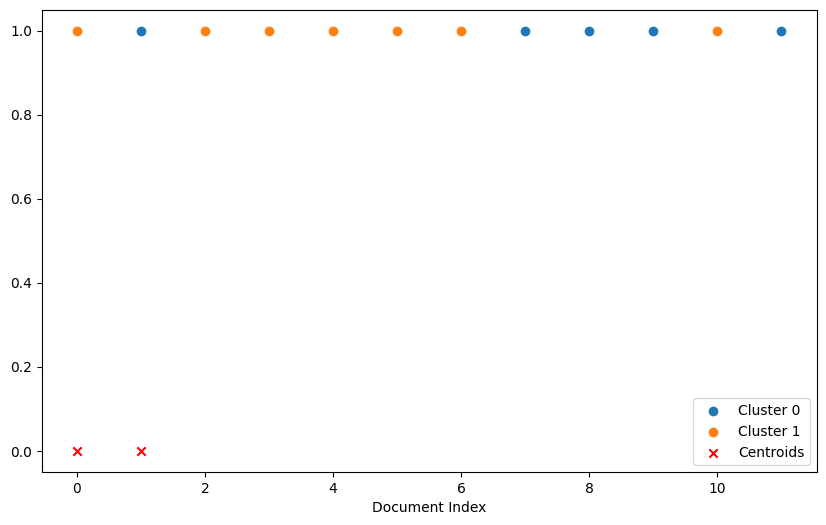

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(df[df['Cluster'] == cluster].index, [1] * sum(df['Cluster'] == cluster), label=f'Cluster {cluster}')
plt.scatter(cluster_centroids_df.index, [0] * len(cluster_centroids_df), marker='x', color='red', label='Centroids')
plt.xlabel('Document Index')
plt.legend()
plt.show()

8. Predict the cluster for the document “bhadra wildlife sanctuary”.

In [ ]:
new_document = ["bhadra wildlife sanctuary"]
new_document_tfidf = tfidf_vectorizer.transform(new_document)
predicted_cluster = kmeans.predict(new_document_tfidf)
print("Predicted Cluster for 'bhadra wildlife sanctuary':", predicted_cluster[0])

Predicted Cluster for 'bhadra wildlife sanctuary': 0
